## NLP FINAL PROJECT
### NICK SPIRAKIS

Use what you have learned in this class to develop an application that uses natural language processing. Your project can use any of the concepts that you’ve learned in this course, including n-grams, part-of-speech tagging, text classification, grammars, vector semantics, neural language models, and information extraction. 
The requirements are intentionally vague to allow you to create an application that interests you. If you are stuck for an idea, look at the starred exercises in the NLTK Book for inspiration.

Requirements for this assignment: 
Develop an application that use natural language processing. The application must:

use an NLP concept discussed in this course: 
be developed using python
perform an interesting task
be substantial, including at least 50 lines of code
have well formatted and organized code

Your project must also include a summary of application's purpose, functionality and challenges encountered while working on the project.

In [88]:
# corpus
# https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

#get corpora
import pandas as pd
netflixData = pd.read_csv('Data/netflix_titles.csv')

## Summary

The main focus was making naive bayes classifiers, but I did test with MultinomialNB as well.
MultinomialNB recieved 38% on the test set, comapred to the 42%-45% that my NB classifier has.
I am using the Netflix Corpus, found here https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download
### Purpose: 
#### predict rating given a title, predict if it is a show or movie based on description, predict rating given a description
This was done by trying to find helpful features for each category.
I thought this project was a good idea beacause I think it could be a helpful tool.
For example, if you are making a movie or movie description, you can use the program to see what your movie will most likely be rated.
Depending on your target audience, you may want to change the movie or the description.

### functionality:
##### rating given a description - around 43%. 
##### rating given a title - around 39%. 
##### show or movie given description - around 57%.
These are from NB classifiers made from my features. 
To help improve them, I check if the results were correct, see why not and try to find features to add to my functions.
I also use the show_most_informative_features function for the same reason.

### challenges: picking features for classifiers
##### the hardest part is creating features for prediction, trying to see which ones were helpful, and which were hurtful.

In [89]:
df_combine_rating_des = pd.DataFrame({'title':netflixData.title, 'rating':netflixData.rating, 'type':netflixData.type}) #'description':netflixData.description}

In [90]:
with pd.option_context('display.max_colwidth', None):
  display(df_combine_rating_des)

,title,rating,type
0,Dick Johnson Is Dead,PG-13,Movie
1,Blood & Water,TV-MA,TV Show
2,Ganglands,TV-MA,TV Show
3,Jailbirds New Orleans,TV-MA,TV Show
4,Kota Factory,TV-MA,TV Show
...,...,...,...
8802,Zodiac,R,Movie
8803,Zombie Dumb,TV-Y7,TV Show
8804,Zombieland,R,Movie
8805,Zoom,PG,Movie


In [91]:
#make df into list
df_list = list(df_combine_rating_des.values)

print(df_list[0])

['Dick Johnson Is Dead' 'PG-13' 'Movie']


In [92]:
print(len(df_list))

8807


In [93]:
import nltk

In [94]:
title_tvma_df = df_combine_rating_des.loc[df_combine_rating_des['rating'] == 'TV-MA']

title_tv14_df = df_combine_rating_des.loc[df_combine_rating_des['rating'] == 'TV-14']

title_pg_df = df_combine_rating_des.loc[df_combine_rating_des['rating'] == 'PG']

title_r_df = df_combine_rating_des.loc[df_combine_rating_des['rating'] == 'R']

title_pg13_df = df_combine_rating_des.loc[df_combine_rating_des['rating'] == 'PG-13']


title_tvma_df['title'] + " is rated " + title_tvma_df['rating']

1                Blood & Water is rated TV-MA
2                    Ganglands is rated TV-MA
3        Jailbirds New Orleans is rated TV-MA
4                 Kota Factory is rated TV-MA
5                Midnight Mass is rated TV-MA
                        ...                  
8762           Wrong Side Raju is rated TV-MA
8769    Y.M.I.: Yeh Mera India is rated TV-MA
8788              You Carry Me is rated TV-MA
8798                  Zed Plus is rated TV-MA
8801                   Zinzana is rated TV-MA
Length: 3207, dtype: object

## rating given title

In [95]:
import random

labeled_titles = ([(title, 'PG-13') for title in title_pg13_df.title] + [(title, 'R') for title in title_r_df.title] + 
                 [(title, 'PG') for title in title_pg_df.title] + [(title, 'TV-14') for title in title_tv14_df.title] +
                 [(title, 'TV-MA') for title in title_tvma_df.title])

#print(labeled_titles[0])
random.shuffle(labeled_titles)
#print(labeled_titles[0])

In [96]:
def rating_features(title):
    mid = len(title)//2
    return {'suffix1': title[-1:], 
            'suffix2': title[-2:],
            'prefix': title[:1],
            'middle2': title[mid:],
            'middle1': title[:mid],
            'length': len(title)
           }

featuresets = [(rating_features(n), rating) for (n, rating) in labeled_titles]

train_names, test_names, devtest_names = labeled_titles[1000:], labeled_titles[:500], labeled_titles[500:1000]

train_set = [(rating_features(n), rating) for (n, rating) in train_names]

devtest_set = [(rating_features(n), rating) for (n, rating) in devtest_names]

test_set = [(rating_features(n), rating) for (n, rating) in test_names]


#my_classifier = nltk.NaiveBayesClassifier.train(train_set)
my_classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(my_classifier, devtest_set)

0.398

In [97]:
my_classifier.classify(rating_features('Lifechanger'))

'TV-MA'

In [98]:
#checking to see if guess is correct
errors = []
for (title, rating) in devtest_names:
    guess = my_classifier.classify(rating_features(title))
    if guess != rating:
        errors.append( (rating, guess, title) )
        
for (rating, guess, title) in sorted(errors):
    print('correct={:<8} guess={:<8s} title={:<30}'.format(rating, guess, title))

correct=PG       guess=PG-13    title=Dr. Seuss' The Lorax          
correct=PG       guess=R        title=A Walk to Remember            
correct=PG       guess=R        title=Mune: Guardian of the Moon    
correct=PG       guess=TV-14    title=Big Fat Liar                  
correct=PG       guess=TV-14    title=It Takes Two                  
correct=PG       guess=TV-14    title=Skater Girl                   
correct=PG       guess=TV-14    title=Taare Zameen Par              
correct=PG       guess=TV-MA    title=David Attenborough: A Life on Our Planet
correct=PG       guess=TV-MA    title=God's Not Dead: A Light in Darkness
correct=PG       guess=TV-MA    title=How the Grinch Stole Christmas
correct=PG       guess=TV-MA    title=Judy Moody and the Not Bummer Summer
correct=PG       guess=TV-MA    title=Klaus                         
correct=PG       guess=TV-MA    title=Open Season                   
correct=PG       guess=TV-MA    title=Unaccompanied Minors          
correct=PG   

In [99]:
my_classifier.show_most_informative_features(100)

Most Informative Features
                 middle1 = 'The '          TV-MA : PG     =     14.6 : 1.0
                 suffix2 = 'II'               PG : TV-MA  =     10.5 : 1.0
                 suffix1 = 'G'                PG : TV-MA  =      9.9 : 1.0
                 suffix1 = 'I'                PG : TV-MA  =      9.9 : 1.0
                  length = 33                 PG : PG-13  =      8.8 : 1.0
                  prefix = '6'                 R : TV-14  =      8.0 : 1.0
                 suffix1 = '9'                 R : TV-14  =      7.8 : 1.0
                 suffix2 = 'al'            TV-MA : PG-13  =      7.5 : 1.0
                 suffix2 = 'my'                R : TV-MA  =      7.4 : 1.0
                  prefix = 'X'             PG-13 : TV-14  =      7.4 : 1.0
                  length = 25                 PG : R      =      7.0 : 1.0
                  prefix = '2'             PG-13 : TV-14  =      6.9 : 1.0
                 suffix1 = 'i'             TV-14 : R      =      6.8 : 1.0

##  geussing types (movie or tv show)

In [100]:
# geussing types (movie or tv show)

title_movie_df = df_combine_rating_des.loc[df_combine_rating_des['type'] == 'Movie']

title_show_df = df_combine_rating_des.loc[df_combine_rating_des['type'] == 'TV Show']

title_movie_df['title'] +" is type " + title_movie_df['type']

0                   Dick Johnson Is Dead is type Movie
6       My Little Pony: A New Generation is type Movie
7                                Sankofa is type Movie
9                           The Starling is type Movie
12                          Je Suis Karl is type Movie
                             ...                      
8801                             Zinzana is type Movie
8802                              Zodiac is type Movie
8804                          Zombieland is type Movie
8805                                Zoom is type Movie
8806                              Zubaan is type Movie
Length: 6131, dtype: object

In [101]:
labeled_types = ([(title, 'Movie') for title in title_movie_df.title] + [(title, 'TV Show') for title in title_show_df.title])

random.shuffle(labeled_types)
print(labeled_types[0])

('London Hughes: To Catch a D*ck', 'Movie')


In [102]:
def type_features(title):
    mid = len(title)//2
    return {'suffix1': title[-1:], 
            'suffix2': title[-2:],
            'prefix': title[:1],
            'middle2': title[mid:],
            'middle1': title[:mid],
            'length': len(title),
            'firstThree': title[:2]
           }

featuresets = [(type_features(n), types) for (n, types) in labeled_types]

In [103]:
t_train_names, t_test_names, t_devtest_names = labeled_types[1000:], labeled_types[:500], labeled_types[500:1000]

type_train_set = [(type_features(n), types) for (n, types) in t_train_names]

type_devtest_set = [(type_features(n), types) for (n, types) in t_devtest_names]

type_test_set = [(type_features(n), types) for (n, types) in t_test_names]

my_t_classifier = nltk.NaiveBayesClassifier.train(type_train_set)
nltk.classify.accuracy(my_t_classifier, type_devtest_set) #56.8%

0.568

In [104]:
my_t_classifier.classify(type_features('Lifechanger'))

'Movie'

In [105]:
#error list
errors = []
for (title, types) in t_devtest_names:
    guess = my_t_classifier.classify(type_features(title))
    if guess != types:
        errors.append( (types, guess, title) )
        
for (types, guess, title) in sorted(errors):
    print('correct={:<8} guess={:<8s} title={:<30}'.format(types, guess, title))

correct=Movie    guess=TV Show  title=10,000 B.C.                   
correct=Movie    guess=TV Show  title=AK vs AK                      
correct=Movie    guess=TV Show  title=Agneepath                     
correct=Movie    guess=TV Show  title=Back of the Net               
correct=Movie    guess=TV Show  title=Barrio Universitario          
correct=Movie    guess=TV Show  title=Belief: The Possession of Janet Moses
correct=Movie    guess=TV Show  title=Beneath the Leaves            
correct=Movie    guess=TV Show  title=Breath                        
correct=Movie    guess=TV Show  title=Budapest                      
correct=Movie    guess=TV Show  title=C/O Kaadhal                   
correct=Movie    guess=TV Show  title=Can’t Complain                
correct=Movie    guess=TV Show  title=Catch Me If You Can           
correct=Movie    guess=TV Show  title=Chelsea Peretti: One of the Greats
correct=Movie    guess=TV Show  title=Chopsticks                    
correct=Movie    guess=

## predict rating based on description

In [106]:
#predict rating based on description
df_rate_desc = pd.DataFrame({'title':netflixData.title, 'rating':netflixData.rating, 'description':netflixData.description})

In [107]:
with pd.option_context('display.max_colwidth', None):
  display(df_rate_desc)

,title,rating,description
0,Dick Johnson Is Dead,PG-13,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,Blood & Water,TV-MA,"After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,Ganglands,TV-MA,"To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,Jailbirds New Orleans,TV-MA,"Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,Kota Factory,TV-MA,"In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
...,...,...,...
8802,Zodiac,R,"A political cartoonist, a crime reporter and a pair of cops investigate San Francisco's infamous Zodiac Killer in this thriller based on a true story."
8803,Zombie Dumb,TV-Y7,"While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
8804,Zombieland,R,"Looking to survive in a world taken over by zombies, a dorky college student teams with an urban roughneck and a pair of grifter sisters."
8805,Zoom,PG,"Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."


In [108]:
desc_tvma_df = df_rate_desc.loc[df_rate_desc['rating'] == 'TV-MA']

desc_tv14_df = df_rate_desc.loc[df_rate_desc['rating'] == 'TV-14']

desc_pg_df = df_rate_desc.loc[df_rate_desc['rating'] == 'PG']

desc_r_df = df_rate_desc.loc[df_rate_desc['rating'] == 'R']

desc_pg13_df = df_rate_desc.loc[df_rate_desc['rating'] == 'PG-13']


desc_tv14_df['title'] + " is rated " + desc_tv14_df['rating']

8            The Great British Baking Show is rated TV-14
18                               Intrusion is rated TV-14
20      Monsters Inside: The 24 Faces of Billy Milliga...
21                  Resurrection: Ertugrul is rated TV-14
24                                   Jeans is rated TV-14
                              ...                        
8772                 Yamla Pagla Deewana 2 is rated TV-14
8774                             يوم الدين is rated TV-14
8794                                اشتباك is rated TV-14
8799                                 Zenda is rated TV-14
8806                                Zubaan is rated TV-14
Length: 2160, dtype: object

In [109]:
import random

labeled_descs = ([(description, 'PG-13') for description in desc_pg13_df.description] + 
                 [(description, 'R') for description in desc_r_df.description] + 
                 [(description, 'PG') for description in desc_pg_df.description] + 
                 [(description, 'TV-14') for description in desc_tv14_df.description] +
                 [(description, 'TV-MA') for description in desc_tvma_df.description])

#print(labeled_descs[0])
random.shuffle(labeled_descs)
print(labeled_descs[0])

('After realizing their babies were exchanged at birth, two women develop a plan to adjust to their new lives: creating a single —and peculiar— family.', 'TV-MA')


In [110]:
'''
def desc_features(desc): #36
    mid = len(desc)//2
    return {'suffix1': desc[-1:], 
            'suffix2': desc[-2:],
            'prefix': desc[:1],
            'middle2': desc[mid:],
            'middle1': desc[:mid],
            'length': len(desc)
           }
'''
#desc above is 40%


#desc below is 44.4%
'''
def desc_features(desc): #44.6
    features = {}
    features["first_letter"] = desc[0].lower()
    features["last_letter"] = desc[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = desc.lower().count(letter)
        features["has({})".format(letter)] = (letter in desc.lower())
    return features
'''


#desc below is 45.2%, increase of 5.2% from base
'''
def desc_features(desc): #44
    features = {}
    features["first_letter"] = desc[0].lower()
    features["last_letter"] = desc[-1].lower()
    features["longest_word"] = max(desc)
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = desc.lower().count(letter)
        features["has({})".format(letter)] = (letter in desc.lower())
    return features
'''

def desc_features(desc): #44.0
    features = {}
    features["first_letter"] = desc[0].lower()
    features["last_letter"] = desc[-1].lower()
    features["longest_word"] = max(desc)
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = desc.lower().count(letter)
        features["has({})".format(letter)] = (letter in desc.lower())
    return features


featuresets = [(desc_features(n), description) for (n, description) in labeled_descs]

d_train_names, d_test_names, d_devtest_names = labeled_descs[1000:], labeled_descs[:500], labeled_descs[500:1000]


d_train_set = [(desc_features(n), description) for (n, description) in d_train_names]

d_devtest_set = [(desc_features(n), description) for (n, description) in d_devtest_names]

d_test_set = [(desc_features(n), description) for (n, description) in d_test_names]


#my_classifier = nltk.NaiveBayesClassifier.train(train_set)
d_my_classifier = nltk.NaiveBayesClassifier.train(d_train_set)
nltk.classify.accuracy(d_my_classifier, d_devtest_set)


0.43

In [111]:
d_my_classifier.classify(desc_features(
    "A young boy is wanted for a crime he has no recollection of committing and must go on the run, hunted by two powerful kings and their forces."))

'TV-14'

In [112]:
d_my_classifier.classify(desc_features("A soldier grows disillusioned as he's caught between rival sergeants in this semi-autobiographical Vietnam War drama from writer-director Oliver Stone."))

'TV-14'

In [113]:
d_my_classifier.show_most_informative_features(100)

Most Informative Features
                count(l) = 14                 PG : TV-MA  =     18.3 : 1.0
                count(j) = 3                  PG : TV-MA  =     11.2 : 1.0
                count(p) = 9                  PG : TV-MA  =     11.1 : 1.0
                count(g) = 10                 PG : TV-MA  =     11.1 : 1.0
                count(d) = 12                 PG : TV-MA  =     11.1 : 1.0
            first_letter = 'z'                PG : TV-MA  =     10.8 : 1.0
            longest_word = 'á'             TV-MA : TV-14  =     10.7 : 1.0
            first_letter = 'u'                PG : R      =      8.2 : 1.0
                count(z) = 3                  PG : TV-14  =      7.6 : 1.0
                count(u) = 9                  PG : TV-14  =      7.5 : 1.0
                count(h) = 14                 PG : TV-MA  =      6.6 : 1.0
                count(t) = 1                   R : TV-MA  =      6.6 : 1.0
                count(s) = 18                 PG : TV-MA  =      6.5 : 1.0

## visualization

In [114]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'PG-13'),
 Text(1, 0, 'TV-MA'),
 Text(2, 0, 'PG'),
 Text(3, 0, 'TV-14'),
 Text(4, 0, 'TV-PG'),
 Text(5, 0, 'TV-Y'),
 Text(6, 0, 'TV-Y7'),
 Text(7, 0, 'R'),
 Text(8, 0, 'TV-G'),
 Text(9, 0, 'G'),
 Text(10, 0, 'NC-17'),
 Text(11, 0, '74 min'),
 Text(12, 0, '84 min'),
 Text(13, 0, '66 min'),
 Text(14, 0, 'NR'),
 Text(15, 0, 'TV-Y7-FV'),
 Text(16, 0, 'UR')]

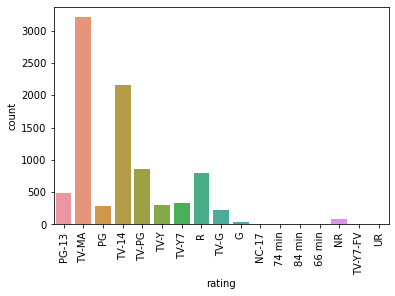

In [115]:
ax = sns.countplot(x = df_combine_rating_des["rating"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [123]:
df_rate_desc = df_rate_desc.dropna(subset=['rating'])
df_rate_desc.isnull().sum()

title          0
rating         0
description    0
dtype: int64

[Text(0, 0, 'PG-13'),
 Text(1, 0, 'TV-MA'),
 Text(2, 0, 'PG'),
 Text(3, 0, 'TV-14'),
 Text(4, 0, 'TV-PG'),
 Text(5, 0, 'TV-Y'),
 Text(6, 0, 'TV-Y7'),
 Text(7, 0, 'R'),
 Text(8, 0, 'TV-G'),
 Text(9, 0, 'G'),
 Text(10, 0, 'NC-17'),
 Text(11, 0, '74 min'),
 Text(12, 0, '84 min'),
 Text(13, 0, '66 min'),
 Text(14, 0, 'NR'),
 Text(15, 0, 'TV-Y7-FV'),
 Text(16, 0, 'UR')]

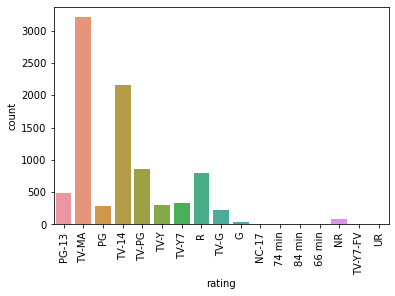

In [117]:
ax = sns.countplot(x = df_combine_rating_des["rating"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## MultinomialNB

In [118]:
my_y = df_rate_desc.rating

my_X1 = df_rate_desc.description

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

my_transformer = TfidfTransformer(smooth_idf=False)
my_count_vectorizer = CountVectorizer(ngram_range=(1, 2))
my_ngrams = my_count_vectorizer.fit_transform(my_X1)

my_ngrams_tfidf = my_transformer.fit_transform(my_ngrams)

my_feature_names = my_count_vectorizer.get_feature_names_out()
len(my_feature_names) #more features because of bigrams

130072

In [120]:
#split into test/train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(my_ngrams_tfidf, my_y, test_size = 0.2, random_state=0)

In [121]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

print('Accuracy of NB  classifier on training set: {:.2f}'.format(clf_nb.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(clf_nb.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.52
Accuracy of NB classifier on test set: 0.38
